In [10]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import sys
from variational_method.method import method
sys.path.append('C:\\Users\\satbek\\CMC-master-dissertation')

In [126]:
def super_gauss(x, y, a, N):
    """
    Супергаусс на сетке x,y с параметрами a, N
    :param x: сетка по x
    :param y: сетка по y
    :param a: параметр, отвечает за размер области, которую срезает супергаусс
    :param N: отвечает за "крутизну" супергаусс, чем больше, тем быстрее функция стремится к 0
    :return: 2d array
    """
    return np.exp(-((x**2 + y**2) / a**2) ** N)


def normalize(front):
    """
    Нормирует исходный волновой фронт на квадрат [-1, 1] x [-1, 1]
    :param front: волновой фронт
    :return: отнормированный волновой фронт
    """
    tmp = front
    tmp -= tmp.min()
    tmp /= tmp.max()
    return tmp


def mse(orig, restored):
    return np.linalg.norm(orig - restored) / np.sqrt(np.prod(restored.shape))


In [137]:
x, y = np.mgrid[-1:1:1j*512, -1:1:1j*512]
h = x[1, 0] - x[0, 0]
s_gauss = super_gauss(x, y, 0.75, 2)
front = 2 * (x**2 + y**2) - 1
g1 = 4 * x
g2 = 4 * y

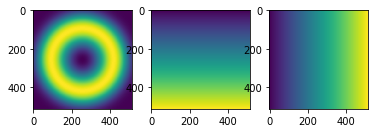

In [140]:
fig, ax = plt.subplots(1, 3)
ax[0].imshow(normalize(front) * s_gauss)
ax[1].imshow(g1)
ax[2].imshow(g2)

In [141]:
restored_front = method(g1, g2, h, h, alpha=0.0001, gamma=0.2)

MSE =  1.5865363321081758e-05


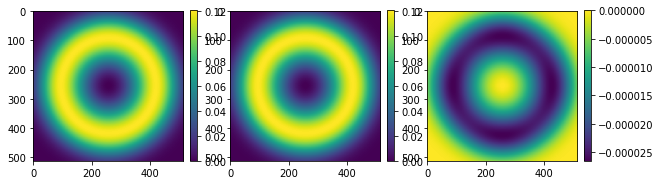

In [142]:
fig, ax = plt.subplots(1, 3, figsize = (10, 20))
orig = normalize(front) * s_gauss
restored = normalize(restored_front) * s_gauss
im1 = ax[0].imshow(orig)
im2 = ax[1].imshow(restored)
im3 = ax[2].imshow(orig - restored)
fig.colorbar(im1, ax=ax[0], fraction=0.046, pad=0.04)
fig.colorbar(im2, ax=ax[1], fraction=0.046, pad=0.04)
fig.colorbar(im3, ax=ax[2], fraction=0.046, pad=0.04)
print("MSE = ", mse(orig, restored))